# Pre-treating data for analysis

In [30]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [79]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from parse_csv_files import parse_tiktok_comments

In [68]:
#data imports 
filename = "../data/TikTok-comments_18-11-2024_12h46.csv"
tiktok = parse_tiktok_comments(filename)
tiktok.head()


,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,User Replied To,Number of Replies,post_url,shown_comments,scraped_comments,difference,publisher,post_likes,post_shares,post_description,date_scraped
0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21.7K,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16.5K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13.2K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10


In [69]:
# 10 K to 10 000 
tiktok['Likes'] = tiktok['Likes'].fillna('0')

#tiktok['Likes'] = np.where(tiktok['Likes'].notna() & tiktok['Likes'].str.endswith('K'),
#                        (tiktok['Likes'].str[:-1].astype(float)*1000),
#                       tiktok['Likes'])

def convert_likes(value):
    try:
        # Si la valeur se termine par 'K', multiplier par 1000
        if value.endswith('K'):
            return float(value[:-1]) * 1000
        # Sinon, convertir directement en float
        return int(value)
    except ValueError:
        # Si la conversion échoue (valeurs comme 'abc'), retourner 0
        return 0

# Appliquer la fonction à toute la colonne
tiktok['Likes'] = tiktok['Likes'].apply(convert_likes)



tiktok['Likes'] = tiktok['Likes'].astype(int)
#tiktok['Likes'] = tiktok['Likes'].fillna(0).astype(int)
tiktok

,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,User Replied To,Number of Replies,post_url,shown_comments,scraped_comments,difference,publisher,post_likes,post_shares,post_description,date_scraped
0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21700,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16500,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13200,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,893,Carter Tesh,cartertesh,https://www.tiktok.com/@cartertesh,Aesthetic is not a gen Z word 😭 are they OK,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,897,338,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
18134,894,GirlsGirlK3llz,girlsgirlk3llz,https://www.tiktok.com/@girlsgirlk3llz,HARRIS,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,897,338,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
18135,895,DIOS SOBRE TODO,dios.sobre.todo98,https://www.tiktok.com/@dios.sobre.todo98,So happy you came into my life sir God bless y...,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,897,338,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
18136,896,sara-no-h 🏳️‍🌈,_sara_no_h__,https://www.tiktok.com/@_sara_no_h__,that was some of the best entertainment I've s...,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,897,338,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10


In [70]:
#deleting comments where users only identify each other (starting with @, ending with a space)
tiktok['Comment Text'] = tiktok['Comment Text'].fillna('').astype(str)

tiktok = tiktok[~tiktok['Comment Text'].str.match(r'^@\w+\s*$')]
tiktok.head()


,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,User Replied To,Number of Replies,post_url,shown_comments,scraped_comments,difference,publisher,post_likes,post_shares,post_description,date_scraped
0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21700,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16500,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13200,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10
4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,---,0,https://www.tiktok.com/@jaketapper/video/73945...,1235,758,477,jaketapper,94.3K,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10


In [77]:
videos_list = tiktok['post_url'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Post " + chr(ord('A')+i)
tiktok['post_name'] = tiktok['post_url'].replace(renaming_posts)


C:\Users\Dasha\AppData\Local\Temp/ipykernel_31848/1359116225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok['post_name'] = tiktok['post_url'].replace(renaming_posts)


In [72]:
# ratio shown comments vs scraped comments

tiktok['ratio_scraped_shown'] = tiktok['scraped_comments']/tiktok['shown_comments']
tiktok['ratio_scraped_shown'].mean()
#mean value of scraped comments out of shown comments on tiktok counter - 56,93% 
tiktok['ratio_scraped_shown'].var()

#variance is 0.0155 

C:\Users\Dasha\AppData\Local\Temp/ipykernel_31848/82458794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok['ratio_scraped_shown'] = tiktok['scraped_comments']/tiktok['shown_comments']


0.015499602588963695

In [73]:
# users - groupby users to see wheher they comment several videos Count the nb of comments ?
count_user =  tiktok.groupby('User @').size().reset_index()
count_user.rename( columns={0 :'count'}, inplace=True )
count_user["count"] = count_user["count"].astype(int)

count_user = count_user.sort_values(by = "count", ascending=False)
count_user[count_user["count"]>=2]

# we have  2711 users that commented posts several times
#need to check if some of them commented on the same post or on differnet posts. 



,User @,count
3926,em_august,16
10861,schfrsgf,14
5239,homoemo,10
10748,sanlee120,9
5082,heathercoxcodes,8
...,...,...
6880,kendal.ek,2
4992,hannahstephsstuff,2
9833,phantomcircus,2
12948,user93883848smd4826,2


In [57]:
#accounting for posts : 

count_post_user =  tiktok.groupby(["post_url",'User @']).size().reset_index()
count_post_user
count_post_user.rename( columns={0 :'count'}, inplace=True )
count_post_user["count"] = count_user["count"].astype(int)

count_post_user = count_post_user.sort_values(by = "count", ascending=False)
count_post_user

#no interaction noticed between different posts. So maybe network would not b einteresting in our case (could be due to the loss of data while scrpaing)

,post_url,User @,count
3926,https://www.tiktok.com/@fallontonight/video/73...,girlinteruptedd,16.0
10861,https://www.tiktok.com/@schfrsgf/video/7395642...,maisha7t,14.0
5239,https://www.tiktok.com/@kamalahq/photo/7394295...,coolcalichic90,10.0
10748,https://www.tiktok.com/@schfrsgf/video/7395642...,lawyermahoraga1,9.0
5082,https://www.tiktok.com/@jaketapper/video/73945...,user72874242413,8.0
...,...,...,...
14324,https://www.tiktok.com/@thekerrywashington/vid...,zulymarp,NaN
14325,https://www.tiktok.com/@thekerrywashington/vid...,zyyoncee,NaN
14326,https://www.tiktok.com/@thekerrywashington/vid...,zyzysarchive,NaN
14327,https://www.tiktok.com/@thekerrywashington/vid...,zz.nevaeh.zz,NaN


<AxesSubplot:xlabel='post_nb', ylabel='interaction_count'>

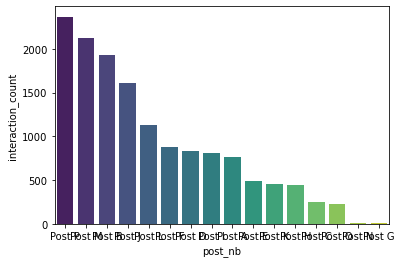

In [58]:
count_post_user.dropna()
users_per_post = count_post_user.groupby('post_url').size().reset_index()
users_per_post.rename( columns={0 :'interaction_count'}, inplace=True )

#renaming post_urls by Post A, B, C..
videos_list = users_per_post['post_url'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Post " + chr(ord('A')+i)
users_per_post['post_nb'] = users_per_post['post_url'].replace(renaming_posts)

users_per_post = users_per_post.sort_values(by='interaction_count', ascending=False)



#barplotting 
sns.barplot(x='post_nb', y='interaction_count', data=users_per_post, palette='viridis')


<AxesSubplot:xlabel='post_nb', ylabel='share_of_users'>

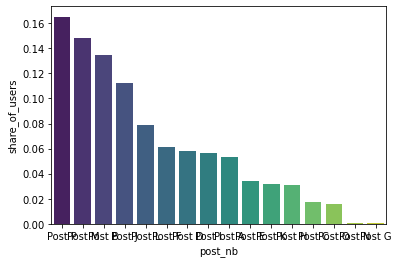

In [59]:

users_per_post['share_of_users'] = users_per_post['interaction_count']/sum(users_per_post['interaction_count'])
users_per_post
sns.barplot(x='post_nb', y='share_of_users', data=users_per_post, palette='viridis')



In [ ]:
#number of likes en moyenne par commentaire sur un post en particulier 

tiktok['Nickname'] = tiktok['Nickname'].astype("string")
tiktok['User @'] = tiktok['User @'].astype("string")

tiktok_postA = tiktok[tiktok['']]

tiktok.dtypes
sns.barplot(x='User @', y='Likes', data=tiktok)#, palette='viridis')


Comment Number (ID)              int32
Nickname                        string
User @                          string
User URL                        object
Comment Text                    object
Time                    datetime64[ns]
Likes                            int32
Profile Picture URL             object
Is 2nd Level Comment            object
User Replied To                 object
Number of Replies                int32
post_url                        object
shown_comments                   int32
scraped_comments                 int32
difference                       int32
publisher                       object
post_likes                      object
post_shares                     object
post_description                object
date_scraped                    object
ratio_scraped_shown            float64
dtype: object

In [ ]:
#number of likes median par commentaire sur un post 



In [ ]:
# Proportion de commentaires avec les emojis (barchart? piechart?)



In [ ]:
# NB OF USERS 
# COMMENT LENGTH 
# NB DE LIKES EN MOYENNE PAR POST PAR COM 
 
# PROPORTION DES COMS AVEC DES EMOJIS 
# COMS SEULEMENT AVEC EMOJIS / EMOJIS ET IDENTIFICATIONS 
# FAIRE DES BINS AVEC NB DE LIKES ? 

#nb de commentaires qui contiennent brat 
#nb de commentaires content kamala 
#nb de coms contenant trump/republican 


In [ ]:
# contains 
tiktok['contains_brat'] = tiktok['Comment Text'].str.contains('brat', case = False, regex=True)
tiktok['contains_kamala'] = tiktok['Comment Text'].str.contains('kamala', case = False, regex=True)
tiktok['contains_trump'] = tiktok['Comment Text'].str.contains('trump', case = False, regex=True)
tiktok['contains_politics'] = tiktok['Comment Text'].str.contains('politic', case = False, regex=True)
tiktok['contains_democrat']= tiktok['Comment Text'].str.contains('democrat', case = False, regex=True)
tiktok['contains_republican'] = tiktok['Comment Text'].str.contains('republican', case = False, regex=True)



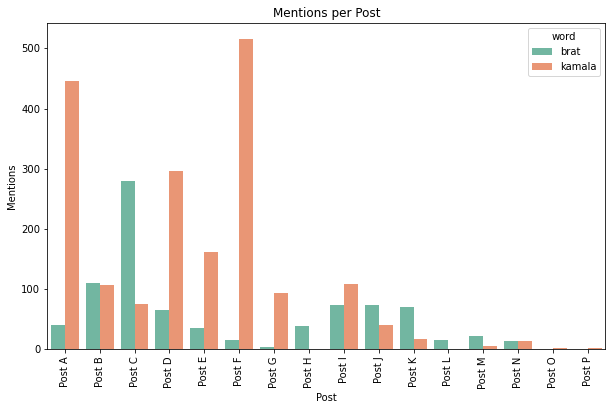

In [80]:

# Compter les mentions pour chaque mot par post
mentions = tiktok.groupby('post_name')[['contains_brat', 'contains_kamala']].sum()

# Passer en colonnes pour un tracé simultané
mentions.reset_index(inplace=True)

# Visualisation avec sns.barplot
mentions_long = mentions.melt(id_vars='post_name', var_name='word', value_name='mentions')

# Renommer les mots pour plus de clarté
mentions_long['word'] = mentions_long['word'].str.replace('contains_', '')

# Tracé du graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mentions_long,
    x='post_name',
    y='mentions',
    hue='word',
    palette='Set2'
)
plt.xticks(rotation=90)
plt.title("Mentions per Post")
plt.xlabel("Post")
plt.ylabel("Mentions")
plt.show()


In [81]:
renaming_table = pd.DataFrame(list(renaming_posts.items()), columns=['post_url', 'post_nb'])

# Save the table to a CSV file
renaming_table.to_csv('post_renaming_table.csv', index=False)

# Print the table to check
print(renaming_table)

                                             post_url post_nb
0   https://www.tiktok.com/@mebbytoks/video/739415...  Post A
1   https://www.tiktok.com/@thekerrywashington/vid...  Post B
2   https://www.tiktok.com/@jaketapper/video/73945...  Post C
3   https://www.tiktok.com/@schfrsgf/video/7395642...  Post D
4   https://www.tiktok.com/@athanchekas/video/7394...  Post E
5   https://www.tiktok.com/@reals.nas/video/740484...  Post F
6   https://www.tiktok.com/@em_august/video/739469...  Post G
7   https://www.tiktok.com/@kamalahq/photo/7394598...  Post H
8   https://www.tiktok.com/@anatomyofafall/video/7...  Post I
9   https://www.tiktok.com/@fallontonight/video/73...  Post J
10  https://www.tiktok.com/@msnbc/video/7395245422...  Post K
11  https://www.tiktok.com/@kamalahq/photo/7394295...  Post L
12  https://www.tiktok.com/@billy.pickett/video/73...  Post M
13  https://www.tiktok.com/@temhota36/video/738623...  Post N
14  https://www.tiktok.com/@shitindiedisco/video/7...  Post O
15  http

# TF-IDF